In [1]:
#Import everything you need
from astropy.io import fits
from astropy.table import Table, Column, hstack
from photutils import CircularAperture, CircularAnnulus, aperture_photometry
from astropy.modeling import models, fitting
import pdb
import numpy as np
import glob
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
# Import all the files (A1 data)
hdu_filenames = glob.glob('//data1//tso_analysis//wlp8_sub_data//*.fits')
hdu_filenames

['//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I001.slp.fits',
 '//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I002.slp.fits',
 '//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I003.slp.fits',
 '//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I004.slp.fits',
 '//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I005.slp.fits',
 '//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I006.slp.fits',
 '//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I007.slp.fits',
 '//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I008.slp.fits',
 '//data1//tso_analysis//wlp8_sub_data/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53_I009.slp.fits',
 '//data1/

In [3]:
# Run the code for the best aperture radius
center = (167,161)
single_rad_data = Table(names=('Flux','Time'))
for hdus in hdu_filenames:
    hdu = fits.open(hdus)
    image = hdu[0].data
    image2d = image[0]
    mask = np.isnan(image2d) == True
    aperture = CircularAperture(center, r = 39)
    phot_table = aperture_photometry(image2d, aperture, mask = mask)
    header = hdu[0].header
    time = [(header["NGROUP"] + 1) * header["TGROUP"] * (header["ON_NINT"] - 1)]
    a = [phot_table[0][0]]
    b = time
    single_rad_data.add_row([a,b])
    hdu.close()
single_rad_data

Flux,Time
float64,float64
1648212.75321,0.0
1650047.36377,22.38012
1659086.06569,44.76024
1651010.50639,67.14036
1650322.02808,89.52048
1649950.18671,111.9006
1654365.84388,134.28072
1650819.66527,156.66084
1652072.12513,179.04096


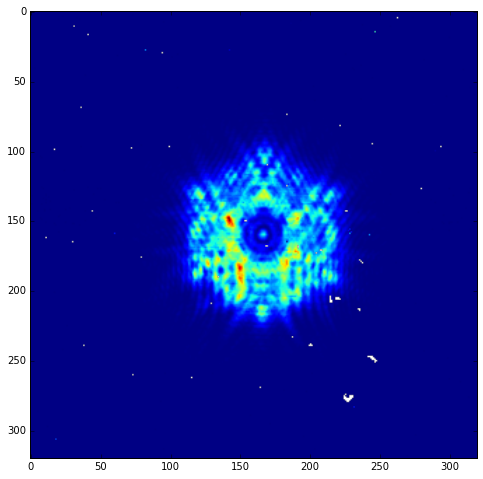

In [4]:
plt.imshow(image2d)  #ignore this line

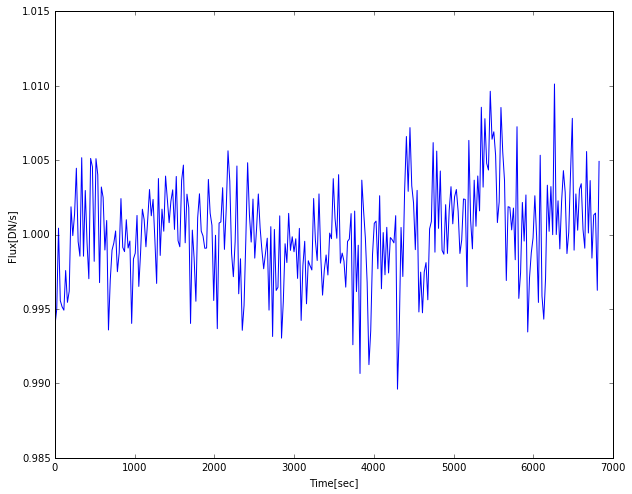

In [5]:
# Light curve of first data set without error bars
x = single_rad_data['Time']
y = single_rad_data['Flux']
first_data_plot = plt.plot(x, y/np.median(y))
plt.xlabel('Time[sec]')
plt.ylabel('Flux[DN/s]')

In [6]:
# Calculate error (first data set)
gain = 2.2
errors_DNps = (np.sqrt((single_rad_data['Flux'])*header['INTTIME']*gain))/(gain*header['INTTIME'])
errors_normalized = errors_DNps/single_rad_data['Flux']
errors_normalized

0.000113748445067
0.00011368519169
0.000113375090257
0.000113652026841
0.000113675730941
0.000113688539497
0.000113536715448
0.000113658595957
0.000113615504673
0.000113293816534
0.000113403487263


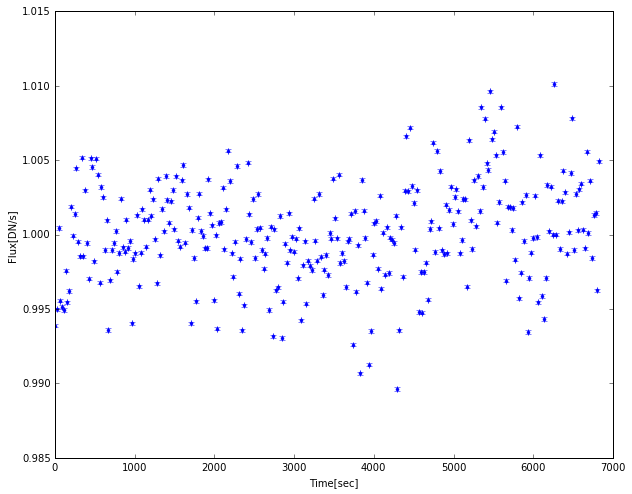

In [7]:
# Light curve of first data set with error bars
x = single_rad_data['Time']
y = single_rad_data['Flux']
plt.errorbar(x, y/np.median(y), xerr = 0, yerr = errors_normalized, fmt='.')
plt.xlabel('Time[sec]')
plt.ylabel('Flux[DN/s]')

#Generating white noise
# sigma = errors.mean()
# med = np.median(y)
# white = np.random.normal(med,sigma,y.size)
# plt.plot(x,white, 'o')

In [8]:
#Calculate Aperture sum error with the 2nd image plane
center = (167,161)
t_2 = Table(names=('Flux','Time','Aperture_sum_err'))
for hdus in hdu_filenames:
    hdu = fits.open(hdus)
    image = hdu[0].data
    error2d = image[1]
    mask = np.isnan(image2d) == True
    aperture = CircularAperture(center, r = 39)
    phot_table = aperture_photometry(image2d, aperture, error = error2d, mask = mask)
    header = hdu[0].header
    time = [(header["NGROUP"] + 1) * header["TGROUP"] * (header["ON_NINT"] - 1)]
    a = [phot_table[0][0]]
    b = time
    c = [phot_table[0][1]]
    t_2.add_row([a,b,c])
    hdu.close()
t_2

Flux,Time,Aperture_sum_err
float64,float64,float64
1666527.75168,0.0,83.4655937376
1666527.75168,22.38012,76.0029935567
1666527.75168,44.76024,76.9844643822
1666527.75168,67.14036,69.7287223847
1666527.75168,89.52048,80.297408936
1666527.75168,111.9006,85.3302542416
1666527.75168,134.28072,83.785630409
1666527.75168,156.66084,80.1103796995
1666527.75168,179.04096,72.7124498198


In [9]:
# Compare error by previous method to this one
err_comparison_table = Table(names = ('Error by formula','Error by image plane'))
for index in range(306):
    err_comparison_table.add_row([errors_normalized[index],t_2['Aperture_sum_err'][index]])
err_comparison_table

Error by formula,Error by image plane
float64,float64
0.000113748445067,83.4655937376
0.00011368519169,76.0029935567
0.000113375090257,76.9844643822
0.000113652026841,69.7287223847
0.000113675730941,80.297408936
0.000113688539497,85.3302542416
0.000113536715448,83.785630409
0.000113658595957,80.1103796995
0.000113615504673,72.7124498198


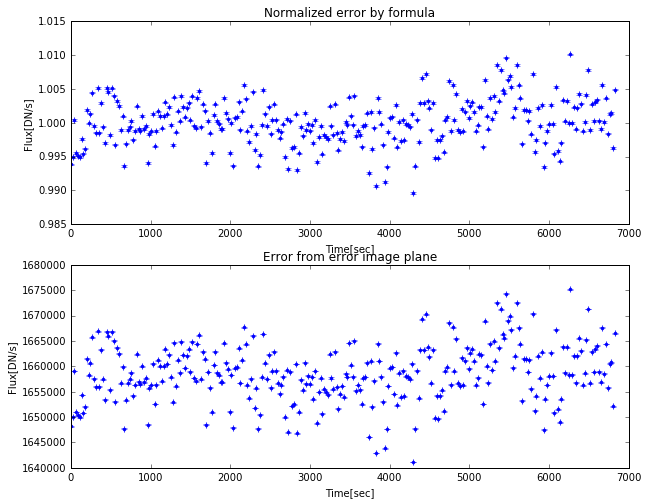

In [10]:
plt.subplot(2,1,1)
x = single_rad_data['Time']
y = single_rad_data['Flux']
plt.errorbar(x, y/np.median(y), xerr = 0, yerr = errors_normalized, fmt='.')
plt.xlabel('Time[sec]')
plt.ylabel('Flux[DN/s]')
plt.title('Normalized error by formula')

plt.subplot(2,1,2)
x = single_rad_data['Time']
y = single_rad_data['Flux']
plt.errorbar(x, y, xerr = 0, yerr = t_2['Aperture_sum_err'], fmt='.')
plt.xlabel('Time[sec]')
plt.ylabel('Flux[DN/s]')
plt.title('Error from error image plane')

#  B4 data

In [12]:
#Importing second data set
hdu_filenames_b4 = glob.glob('//data//External//ISIMCV3_unzipped//NRCN821//fitsfilesonly//raw_separated_MMM//'
                             + 'NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29//*slp.fits')
hdu_filenames_b4

['//data//External//ISIMCV3_unzipped//NRCN821//fitsfilesonly//raw_separated_MMM//NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29/NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29_I001.slp.fits',
 '//data//External//ISIMCV3_unzipped//NRCN821//fitsfilesonly//raw_separated_MMM//NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29/NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29_I002.slp.fits',
 '//data//External//ISIMCV3_unzipped//NRCN821//fitsfilesonly//raw_separated_MMM//NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29/NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29_I003.slp.fits',
 '//data//External//ISIMCV3_unzipped//NRCN821//fitsfilesonly//raw_separated_MMM//NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29/NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29_I004.slp.fits',
 '//data//External//ISIMCV3_unzipped//NRCN821//fitsfilesonly//raw_separated_MMM//NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29/NRCN821WLP8SUB-6012134957_1_489_SE_2

In [13]:
#Generate flux & time of each image for all aperture radii (second data set)
center = (161,163)
t_new = Table(names=('Flux','Time','Aperture Radius'))
for hdus_new in hdu_filenames_b4:
    hdu_new = fits.open(hdus_new)
    image_new = hdu_new[0].data
    image2d_new = image_new[0,:,:]
    mask = np.isnan(image2d_new) == True
    radius = np.arange(5,200,1)
    for r in radius:
        aperture = CircularAperture(center, r)
        phot_table = aperture_photometry(image2d_new, aperture, mask = mask)
        header_new = hdu_new[0].header
        time = [(header_new["NGROUP"] + 1) * header_new["TGROUP"] * (header_new["ON_NINT"] - 1)]
        a = [phot_table[0][0]]
        b = time
        c = r
        t_new.add_row([a,b,c])
    hdu_new.close()
t_new

Flux,Time,Aperture Radius
float64,float64,float64
9680.04841156,0.0,5.0
14647.9093,0.0,6.0
21307.1082671,0.0,7.0
29283.3450498,0.0,8.0
38705.2276883,0.0,9.0
49923.7302049,0.0,10.0
62829.8840877,0.0,11.0
77740.2783386,0.0,12.0
95761.2279251,0.0,13.0


In [14]:
# Second data set
# Generate Standard deviation of all images for each aperture radii
# Generate Median flux of all images for each aperture radii (so that you can normalize standard deviation)
s_new = Table(names=('Median_Flux','St_Dev', 'Ap_Rad'))
for r in radius:
    indices = t_new['Aperture Radius'] == r
    st_dev = np.std(t_new["Flux"][indices])
    median_flux = np.median(t_new["Flux"][indices])
    s_new.add_row([median_flux,st_dev,r])
s_new

Median_Flux,St_Dev,Ap_Rad
float64,float64,float64
9695.35025107,97.953254362,5.0
14680.7198569,156.524170305,6.0
21332.694423,171.998815582,7.0
29294.8154652,153.337328992,8.0
38637.8696221,302.210829707,9.0
49796.6207832,460.944437697,10.0
62679.0121746,625.135313594,11.0
77569.1278329,783.328853398,12.0
95605.1083078,1008.765012,13.0


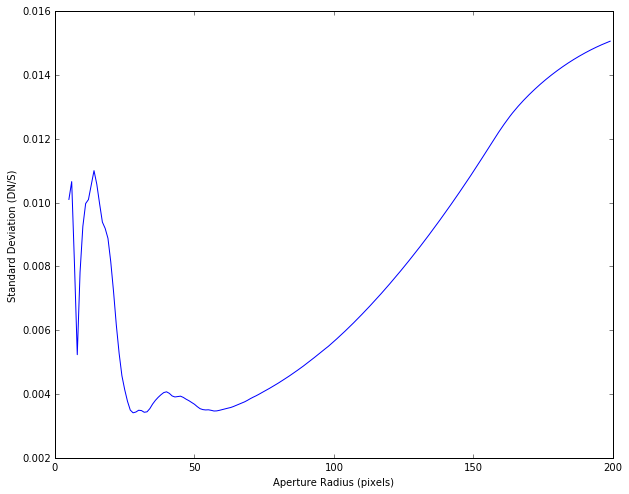

In [15]:
# Plot normalized standard deviation (second data set)
u_new = s_new['Ap_Rad']
v_new = s_new['St_Dev']/s_new['Median_Flux']
plt.plot(u_new, v_new)
plt.ylabel('Standard Deviation (DN/S)')
plt.xlabel('Aperture Radius (pixels)')

In [16]:
# Find minimum deviation and the corresponding aperture radius (second data set)
min_stdev = np.amin(v_new)
best_ap_rad = u_new[v_new.argmin()]
print "The minimum standard deviation is %f" % min_stdev
print "It occurs for the radius r = %f" % best_ap_rad

The minimum standard deviation is 0.003411
It occurs for the radius r = 28.000000


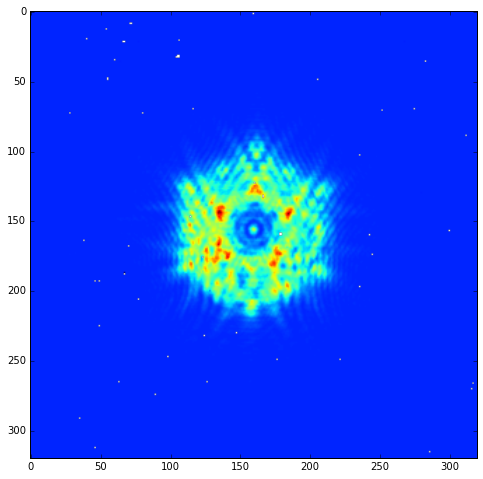

In [17]:
plt.imshow(image2d_new) #Second data set 

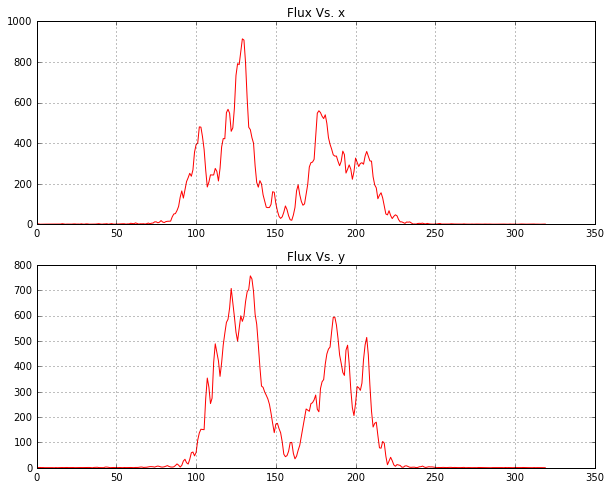

In [18]:
# Figuring out the center for image2d_new
plt.subplot(2,1,1)
plt.title("Flux Vs. x")
plt.plot(image2d_new[:,163],'r-')
plt.grid(True)
plt.subplot(2,1,2)
plt.title("Flux Vs. y")
plt.plot(image2d_new[161,:],'r-')
plt.grid(True)

In [19]:
#Flux Vs. time B4 data
center = (161,163)
single_rad_data_b4 = Table(names=('Flux','Time'))
for hdus_b4 in hdu_filenames_b4:
    hdu_b4 = fits.open(hdus_b4)
    image_b4 = hdu_b4[0].data
    image2d_b4 = image_b4[0,:,:]
    mask = np.isnan(image2d_b4) == True
    aperture = CircularAperture(center, r = 28)
    phot_table = aperture_photometry(image2d_b4, aperture, mask = mask)
    header_b4 = hdu_b4[0].header
    time = [(header_b4["NGROUP"] + 1) * header_b4["TGROUP"] * (header_b4["ON_NINT"] - 1)]
    a = [phot_table[0][0]]
    b = time
    single_rad_data_b4.add_row([a,b])
    hdu_b4.close()
single_rad_data_b4

Flux,Time
float64,float64
946924.501352,0.0
949365.538692,22.38012
944284.643832,44.76024
946147.10577,67.14036
947851.63928,89.52048
946804.922289,111.9006
944338.381954,134.28072
947053.997961,156.66084
943591.525238,179.04096


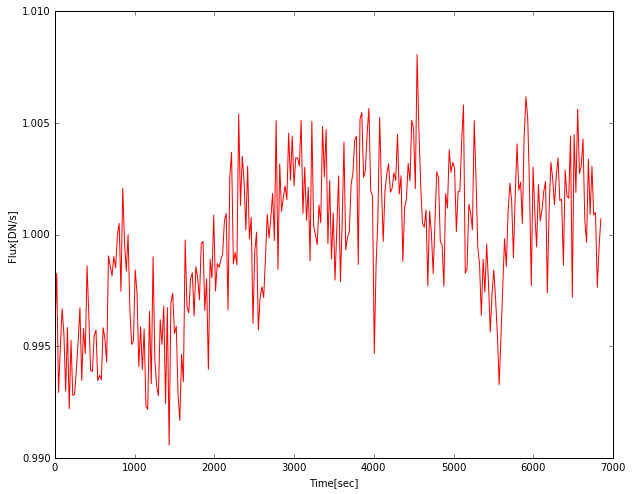

In [20]:
# Creating light curve
x_b4 = single_rad_data_b4['Time']
y_b4 = single_rad_data_b4['Flux']
second_data_plot = plt.plot(x_b4, y_b4/np.median(y_b4), 'r-')
plt.xlabel('Time[sec]')
plt.ylabel('Flux[DN/s]')

In [21]:
# Calculate error (first data set)
gain = 2.5
errors_DNps_b4 = (np.sqrt((single_rad_data_b4['Flux'])*header_b4['INTTIME']*gain))/(gain*header_b4['INTTIME'])
errors_normalized_b4 = errors_DNps_b4/single_rad_data_b4['Flux']
errors_normalized_b4

0.000140778315021
0.000140597211804
0.000140974958756
0.000140836137937
0.000140709447256
0.000140787204713
0.000140970947568
0.000140768689943
0.000141026726086
0.00014080962501
0.000140984573033


In [22]:
# ** combining both data sets **

0.00230067643807


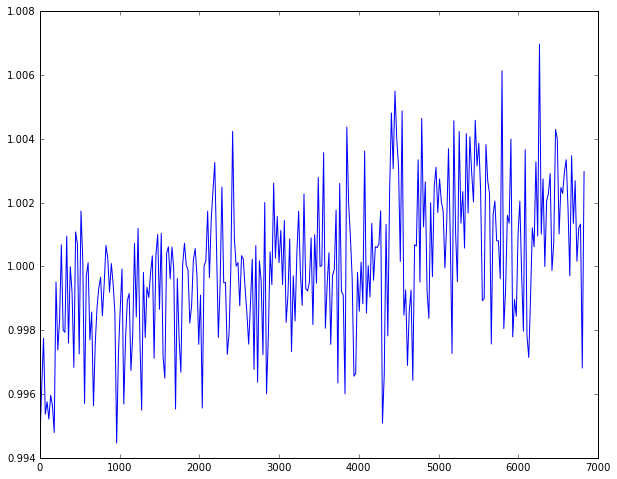

In [23]:
# Averaging A1 data with b4
# Creating new time array
a1_time = single_rad_data['Time']
b4_time = single_rad_data_b4['Time'][:306]
average_time_array = (a1_time + b4_time)/2 
# Creating new flux array
a1_flux = single_rad_data['Flux']
b4_flux = single_rad_data_b4['Flux'][:306]
average_flux_array = (a1_flux + b4_flux)/2
# Creating light curve
plt.plot(average_time_array,average_flux_array/np.median(average_flux_array))
normalized_stdev = np.std(average_flux_array)/np.median(average_flux_array)
print normalized_stdev

In [24]:
# Generating average flux for multiple aperture radius
center = (161,163)
t_combo = Table(names=('average_flux_a1_b4','Time','Aperture Radius'))
for index, (hdus, hdus_b4) in enumerate(zip(hdu_filenames, hdu_filenames_b4)):
    hdu = fits.open(hdus)
    hdu_b4 = fits.open(hdus_b4)
    image = hdu[0].data
    image_b4 = hdu_b4[0].data
    image2d = image[0,:,:]
    image2d_b4 = image_b4[0,:,:]
    mask_a1 = np.isnan(image2d) == True
    mask_b4 = np.isnan(image2d_b4) == True
    radius = np.arange(5,200,1)
    for r in radius:
        aperture = CircularAperture(center, r)
        phot_table_a1 = aperture_photometry(image2d, aperture, mask = mask_a1)
        phot_table_b4 = aperture_photometry(image2d_b4, aperture, mask = mask_b4)
        a = (phot_table_a1[0][0] + phot_table_b4[0][0])/2
        b = average_time_array[index]
        c = r
        t_combo.add_row([a,b,c])
    hdu.close()
    hdu_b4.close()
t_combo

average_flux_a1_b4,Time,Aperture Radius
float64,float64,float64
9133.0484517,0.0,5.0
13983.9177576,0.0,6.0
19853.2453106,0.0,7.0
26570.9554211,0.0,8.0
34398.8308118,0.0,9.0
43680.1774426,0.0,10.0
54659.6220083,0.0,11.0
67679.7346666,0.0,12.0
83773.0124505,0.0,13.0


In [25]:
# Generate Standard deviation of all images for each aperture radii
# Generate Median flux of all images for each aperture radii (so that you can normalize standard deviation)
stdev_table = Table(names=('Median_Flux','St_Dev', 'Ap_Rad'))
for r in radius:
    indices = t_combo['Aperture Radius'] == r
    st_dev = np.std(t_combo["average_flux_a1_b4"][indices])
    median_flux = np.median(t_combo["average_flux_a1_b4"][indices])
    stdev_table.add_row([median_flux,st_dev,r])
stdev_table

Median_Flux,St_Dev,Ap_Rad
float64,float64,float64
9200.67941976,77.3498118821,5.0
14089.7820289,124.49323494,6.0
19978.3331949,141.160839271,7.0
26721.5889166,123.97657902,8.0
34502.6395333,255.448996626,9.0
43763.7752922,405.66768315,10.0
54764.0966697,520.971044773,11.0
67839.3581706,627.532497481,12.0
83972.5832499,799.478317841,13.0


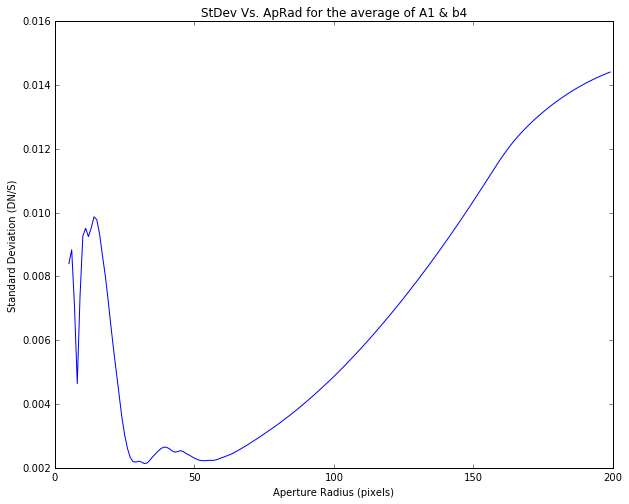

In [26]:
x1 = stdev_table['Ap_Rad']
y1 = stdev_table['St_Dev']/stdev_table['Median_Flux']
plt.plot(x1, y1)
plt.title('StDev Vs. ApRad for the average of A1 & b4')
plt.ylabel('Standard Deviation (DN/S)')
plt.xlabel('Aperture Radius (pixels)')

In [27]:
# Find minimum deviation and the corresponding aperture radius (average)
min_stdev = np.amin(x1)
best_ap_rad = x1[y1.argmin()]
print "The minimum standard deviation is %f" % min_stdev
print "It occurs for the radius r = %f" % best_ap_rad

The minimum standard deviation is 5.000000
It occurs for the radius r = 32.000000


In [28]:
# Generating average residual flux for single aperture radius
center = (161,163)
a1_b4_flux = Table(names=('a1_b4_raw_flux','a1_b4_bkg_flux','a1_b4_res_flux','Time'))
for index, (hdus, hdus_b4) in enumerate(zip(hdu_filenames, hdu_filenames_b4)):
    # opening, slicing and creating mask for a1 data
    hdu = fits.open(hdus)
    image = hdu[0].data
    image2d = image[0,:,:]
    mask_a1 = np.isnan(image2d) == True
    # opening, slicing and creating mask for b4 data
    hdu_b4 = fits.open(hdus_b4)
    image_b4 = hdu_b4[0].data
    image2d_b4 = image_b4[0,:,:]
    mask_b4 = np.isnan(image2d_b4) == True
    # Defining circular & annular aperture
    aperture = CircularAperture(center, r = 80)
    annular_apperture =CircularAnnulus(center, r_in = 90, r_out = 100)
    # Photometric analysis of a1 data
    rawflux_table_a1 = aperture_photometry(image2d, aperture, mask = mask_a1)
    bkgflux_table_a1 = aperture_photometry(image2d, annular_apperture, mask = mask_a1)
    phot_table_a1 = hstack([rawflux_table_a1, bkgflux_table_a1], table_names = ['raw','bkg'])
    bkg_mean_a1 = phot_table_a1['aperture_sum_bkg']/annular_apperture.area()
    bkg_sum_a1 = bkg_mean_a1*aperture.area()
    final_sum_a1 = phot_table_a1['aperture_sum_raw'] - bkg_sum_a1
    phot_table_a1['residual_aperture_sum'] = final_sum_a1
    # Photometric analysis of b4 data
    rawflux_table_b4 = aperture_photometry(image2d_b4, aperture, mask = mask_b4)
    bkgflux_table_b4 = aperture_photometry(image2d_b4, annular_apperture, mask = mask_b4)
    phot_table_b4 = hstack([rawflux_table_b4, bkgflux_table_b4], table_names = ['raw','bkg'])
    bkg_mean_b4 = phot_table_b4['aperture_sum_bkg']/annular_apperture.area()
    bkg_sum_b4 = bkg_mean_b4*aperture.area()
    final_sum_b4 = phot_table_b4['aperture_sum_raw'] - bkg_sum_b4
    phot_table_b4['residual_aperture_sum'] = final_sum_b4
    # Fixing Table columns
    a = (phot_table_a1[0][0] + phot_table_b4[0][0])/2
    b = (phot_table_a1[0][3] + phot_table_b4[0][3])/2
    c = (phot_table_a1[0][6] + phot_table_b4[0][6])/2
    d = single_rad_data['Time'][index]
    a1_b4_flux.add_row([a,b,c,d])
    hdu.close()
    hdu_b4.close()
a1_b4_flux

a1_b4_raw_flux,a1_b4_bkg_flux,a1_b4_res_flux,Time
float64,float64,float64,float64
3938583.70286,4439.26623084,3923630.38503,0.0
3950901.60387,7340.25215976,3926176.54396,22.38012
3948002.51414,6564.89605462,3925889.18006,44.76024
3936521.04107,2752.45974497,3927249.59772,67.14036
3938320.51843,2569.00326849,3929667.03373,89.52048
3937352.70345,3019.71637906,3927181.02722,111.9006
3939244.50432,4364.95772568,3924541.48882,134.28072
3943414.26923,5049.4472114,3926405.60494,156.66084
3931521.95924,2154.01289183,3924266.33687,179.04096


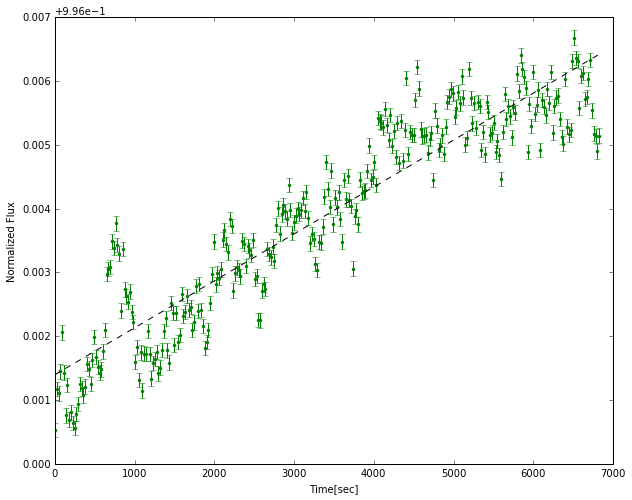

In [29]:
# Time series data (average of A1 and B4 fluxes)
x2 = a1_b4_flux['Time']
y2 = a1_b4_flux['a1_b4_res_flux']/np.median(a1_b4_flux['a1_b4_res_flux'])
# initialize the linear model
l_init = models.Linear1D(slope = -1e4, intercept = -10000)
fit_l = fitting.LevMarLSQFitter()
l = fit_l(l_init, x2, y2)
# Plot the data with bets fit line
plt.errorbar(x2, y2, xerr = 0, yerr = errors_normalized, fmt='g.')
plt.plot(x2, l(x2), 'k--')
plt.xlabel('Time[sec]')
plt.ylabel('Normalized Flux')

In [30]:
# Creating De-trended time series
detrend_flux_data = y2/l(x2)
print np.std(detrend_flux_data)

0.000578414072082


In [31]:
# Finding the normalized standard deviation of a1-b4 data
a1_b4_norm_stdev = np.std(a1_b4_flux['a1_b4_res_flux'])/np.median(a1_b4_flux['a1_b4_res_flux'])
a1_b4_norm_stdev

0.0015653609852060593

In [32]:
# combining errors
a1_b4_norm_err = np.sqrt((np.square(errors_normalized) + np.square(errors_normalized_b4[:306])))/2
average_norm_err = np.mean(a1_b4_norm_err)
average_norm_err

9.0274406019067336e-05

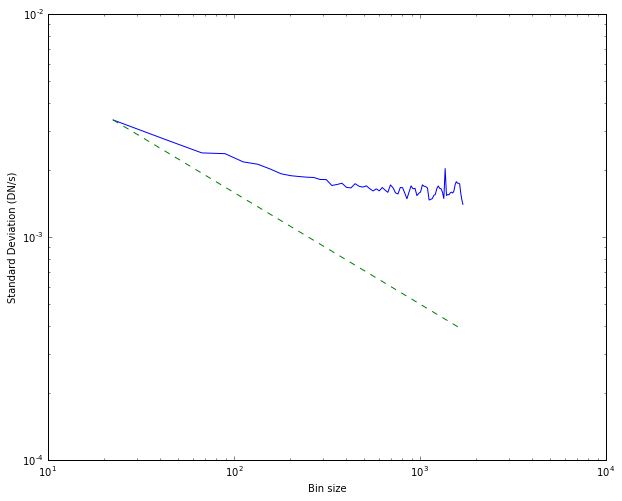

In [33]:
# Rms vs. bins plot for the averaged data

stdev_array = []
time_array = []
model = []
bin_size_array = np.arange(1,77,1)
for bin_size in bin_size_array:
    flux_array = []
    for bins in range(0,306,bin_size):
        bin_start = bins
        bin_end   = bins + bin_size
        flux_in_one_bin = np.average(a1_b4_flux['a1_b4_raw_flux'][bin_start:bin_end])
        flux_array.append(flux_in_one_bin)
    norm_flux_array = flux_array/np.median(a1_b4_flux['a1_b4_raw_flux'][bin_start:bin_end])
    time_point = a1_b4_flux['Time'][bin_size] - a1_b4_flux['Time'][0]
    time_array.append(time_point)
    stdev_in_one_bin = np.std(norm_flux_array)
    stdev_array.append(stdev_in_one_bin)
    model.append(average_norm_err/np.sqrt(bin_size))
    
model = stdev_array[0]/np.sqrt(bin_size_array)

plt.loglog(time_array,stdev_array)
plt.loglog(time_array, model, '--')
plt.xlabel('Bin size')
plt.ylabel('Standard Deviation (DN/s)')

In [34]:
# ***Differently processed A1 & B4 data***